In [10]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Analysis of variance (ANOVA)

* Analysis of variance is one of the most used tests in Stats 

* Concerned with the differences in means.
 * `Sort of` generalization of t-test to multiple samples

In [19]:
load("data/clinicaltrial.Rdata")
clin.trial

drug,therapy,mood.gain
<fct>,<fct>,<dbl>
placebo,no.therapy,0.5
placebo,no.therapy,0.3
placebo,no.therapy,0.1
anxifree,no.therapy,0.6
anxifree,no.therapy,0.4
anxifree,no.therapy,0.2
joyzepam,no.therapy,1.4
joyzepam,no.therapy,1.7
joyzepam,no.therapy,1.3


In [8]:
xtabs( ~drug, clin.trial)


drug
 placebo anxifree joyzepam 
       6        6        6 

drug,mood.gain
<fct>,<dbl>
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [9]:
aggregate( mood.gain ~ drug, clin.trial, mean )

drug,mood.gain
<fct>,<dbl>
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [11]:
aggregate( mood.gain ~ drug, clin.trial, sd)

drug,mood.gain
<fct>,<dbl>
placebo,0.2810694
anxifree,0.3920034
joyzepam,0.2136976


# Add plot here with SD


* The experimenter is interested in comparing the average change for more than two classes
  * Here compere the mean mood change across three different groups


* t-test (Chapter 13), but involving more than two groups. 

$\mu_p$ for placebo, and let $\mu_A$ Anxifree and $\mu_j$ Joyzepam

Null hypothesis: all means are identical
 * That is, neither of the two drugs is any more effective than a placebo. 

* $H_0 : \mu_P = \mu_A = \mu_J$

* $H_a: \mu_P \ne \mu_A or P \ne \mu_J or \mu_P ne \mu_a$



* Suppose G refers to the number of groups tested
* $N$: total sample size
* $N_k$ people in the kth group
* $Y_ik$, mood change for ith member of the kth group



* Variance is computed as:

$$
\mbox{Var}(Y) = \frac{1}{N} \sum_{k=1}^G \sum_{i=1}^{N_k} \left(Y_{ik} - \bar{Y} \right)^2
$$

### ANOVA  hypothesis
* In the null, the between variance is small (or 0) 
  * Total variance is equal to variance within 

![](https://www.dropbox.com/s/2opvff2zro8fs50/variance.png?dl=1)

### Total Sum of Squares and the Within Sum of Squares

$$
\mbox{SS}_{tot} = \sum_{k=1}^G \sum_{i=1}^{N_k} \left(Y_{ik} - \bar{Y} \right)^2
$$ 
$$
\mbox{SS}_w = \sum_{k=1}^G \sum_{i=1}^{N_k} \left( Y_{ik} - \bar{Y}_k \right)^2
$$

* $SS_w$ to be smaller than the total sum of squares, because it’s completely ignoring any group differences 
 
  * The fact that the drugs (if they work) will have different effects on people’s moods.





### The Between Sum of Squares

$$
\begin{array}{rcl}
\mbox{SS}_{b} &=& \sum_{k=1}^G \sum_{i=1}^{N_k} \left( \bar{Y}_k - \bar{Y} \right)^2
 \\
&=& \sum_{k=1}^G N_k \left( \bar{Y}_k - \bar{Y} \right)^2
\end{array}
$$



### The Test Statistic

* The idea behind ANOVA is to compare the two sums of squares values $SS_b$ and $SS-w$ to each other: 
   * If the between-group variation is $SS_b$ is large relative to the within-group variation $SS_w$ then we have reason to suspect that the population means for the different groups aren’t identical to each other.
   
* Compute the   F ratio
$$
F = \frac{\mbox{MS}_b }{ \mbox{MS}_w } 
$$
Where

$$
\begin{array}{lcl}
\mbox{MS}_b &=& \displaystyle\frac{\mbox{SS}_b }{ \mbox{df}_b} \\
\mbox{MS}_w &=& \displaystyle\frac{\mbox{SS}_w }{ \mbox{df}_w} 
\end{array}
$$

$$
\begin{array}{lcl}
\mbox{df}_b &=& G-1 \\
\mbox{df}_w &=& N-G \\
\end{array}
$$






### The Test Statistic

* Bigger values of F mean that the between-group variation is large, relative to the within-group variation. 
  * Larger the value of F, the more evidence we have against the null hypothesis

* How large does F have to be in order to actually reject H0? 

* The sampling distribution for the F statistic under the null hypothesis is an F distribution.

### The F-Distribution

* Looks a bit like a $\chi^2$ distribution
 * Arises whenever you need to compare two \chi^2 distributions to one another
 * Example computing the ratio of two $\chi^2$ quantities
* Recall that the \chi^2 is the key distribution when we’re taking a “sum of squares”
   * Thus if we want to compare the “sums of squares” of two distributions then we need the F-distribution



In [15]:
df_b = 3 
df_w = 6
x_axis = seq(0, 10, 0.05)

x_axis

[1]  0.00  0.05  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  0.55
 [13]  0.60  0.65  0.70  0.75  0.80  0.85  0.90  0.95  1.00  1.05  1.10  1.15
 [25]  1.20  1.25  1.30  1.35  1.40  1.45  1.50  1.55  1.60  1.65  1.70  1.75
 [37]  1.80  1.85  1.90  1.95  2.00  2.05  2.10  2.15  2.20  2.25  2.30  2.35
 [49]  2.40  2.45  2.50  2.55  2.60  2.65  2.70  2.75  2.80  2.85  2.90  2.95
 [61]  3.00  3.05  3.10  3.15  3.20  3.25  3.30  3.35  3.40  3.45  3.50  3.55
 [73]  3.60  3.65  3.70  3.75  3.80  3.85  3.90  3.95  4.00  4.05  4.10  4.15
 [85]  4.20  4.25  4.30  4.35  4.40  4.45  4.50  4.55  4.60  4.65  4.70  4.75
 [97]  4.80  4.85  4.90  4.95  5.00  5.05  5.10  5.15  5.20  5.25  5.30  5.35
[109]  5.40  5.45  5.50  5.55  5.60  5.65  5.70  5.75  5.80  5.85  5.90  5.95
[121]  6.00  6.05  6.10  6.15  6.20  6.25  6.30  6.35  6.40  6.45  6.50  6.55
[133]  6.60  6.65  6.70  6.75  6.80  6.85  6.90  6.95  7.00  7.05  7.10  7.15
[145]  7.20  7.25  7.30  7.35  7.40  7.45  7.50  7.55  7.60  7.65  7.70  7.75
[157]  7.80  7.85  7.90  7.95  8.00  8.05  8.10  8.15  8.20  8.25  8.30  8.35
[169]  8.40  8.45  8.50  8.55  8.60  8.65  8.70  8.75  8.80  8.85  8.90  8.95
[181]  9.00  9.05  9.10  9.15  9.20  9.25  9.30  9.35  9.40  9.45  9.50  9.55
[193]  9.60  9.65  9.70  9.75  9.80  9.85  9.90  9.95 10.00

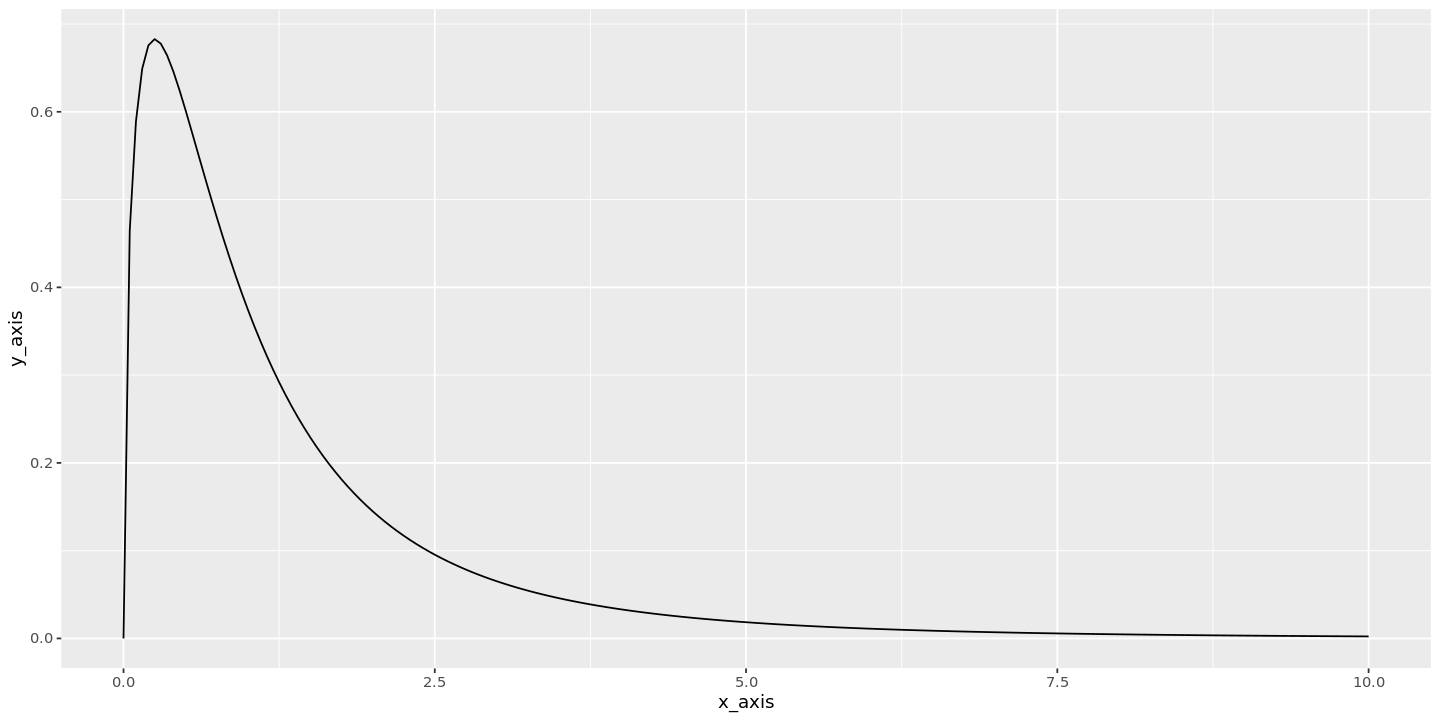

In [17]:
options(repr.plot.width=12, repr.plot.height=6)
y_axis = df(x_axis, df_b, df_w)
ggplot() + 
  geom_line(aes(x_axis, y_axis))


### The model for the Data

For the null hypothesis, the assumption is:

$$
Y_{ik} = \mu + \epsilon_{ik}
$$ 

where, 
$
\epsilon_{ik} \sim \mbox{Normal}(0, \sigma^2)
$$

Where as for the alternative, the assumption is: 
$$
Y_{ik} = \mu_k + \epsilon_{ik}
$$


### The model for the Data - Cont'd

The MS_w and MS_b as estimators of the variances


The MSw is an esitmate of the residual variance \sigma^2
  * So it is $\chi^2$ distributed
The MSb is an estimtor of the resudulas variance plus a quantity that depends on the true differences among the group means.
  * So it is $\chi^2$ distributed

Thus, the ratio of two $\chi^2$ dstributed quantities follows and F-distribution





In [23]:
### For the practice

temp_data = tibble(clin.trial[, c(1,3)])
head(temp_data)



drug,mood.gain
<fct>,<dbl>
placebo,0.5
placebo,0.3
placebo,0.1
anxifree,0.6
anxifree,0.4
anxifree,0.2


In [48]:
temp_data %>% 
  group_by(drug) %>% 
  summarise_at(vars(mood.gain), list(group_mean = mean))

drug,group_mean
<fct>,<dbl>
placebo,0.4500
anxifree,0.7167
joyzepam,1.4833


In [49]:
temp_data_2 = temp_data %>% 
  group_by(drug) %>% 
  mutate(group_mean = mean(mood.gain))
temp_data_2

drug,mood.gain,group_mean
<fct>,<dbl>,<dbl>
placebo,0.5,0.4500
placebo,0.3,0.4500
placebo,0.1,0.4500
anxifree,0.6,0.7167
anxifree,0.4,0.7167
anxifree,0.2,0.7167
joyzepam,1.4,1.4833
joyzepam,1.7,1.4833
joyzepam,1.3,1.4833


In [50]:
temp_data_3 = temp_data_2 %>%
   mutate(dev_from_mean = mood.gain - group_mean)
temp_data_3

drug,mood.gain,group_mean,dev_from_mean
<fct>,<dbl>,<dbl>,<dbl>
placebo,0.5,0.4500,0.05000
placebo,0.3,0.4500,-0.15000
placebo,0.1,0.4500,-0.35000
anxifree,0.6,0.7167,-0.11667
anxifree,0.4,0.7167,-0.31667
anxifree,0.2,0.7167,-0.51667
joyzepam,1.4,1.4833,-0.08333
joyzepam,1.7,1.4833,0.21667
joyzepam,1.3,1.4833,-0.18333


In [51]:
options(digits=4)
temp_data_4 = temp_data_3 %>%
  mutate(sq_dev_from_mean = dev_from_mean **2)
head(temp_data_4, digits = 2)

drug,mood.gain,group_mean,dev_from_mean,sq_dev_from_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
placebo,0.5,0.4500,0.0500,0.00250
placebo,0.3,0.4500,-0.1500,0.02250
placebo,0.1,0.4500,-0.3500,0.12250
anxifree,0.6,0.7167,-0.1167,0.01361
anxifree,0.4,0.7167,-0.3167,0.10028
anxifree,0.2,0.7167,-0.5167,0.26694


In [52]:
SS_w = sum(temp_data_4["sq_dev_from_mean"])
SS_w

[1] 1.392

In [58]:
all_data_mean =  mean(clin.trial$mood.gain)
between_mean_data = temp_data %>% 
  group_by(drug) %>% 
  summarise_at(vars(mood.gain), list(group_mean = mean)) %>%
  mutate(grand_mean=all_data_mean) %>%
  mutate(deviation=group_mean - grand_mean) %>%
  mutate(sq_deviation=deviation **2)

between_mean_data

drug,group_mean,grand_mean,deviation,sq_deviation
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
placebo,0.4500,0.8833,-0.4333,0.18778
anxifree,0.7167,0.8833,-0.1667,0.02778
joyzepam,1.4833,0.8833,0.6000,0.36000


In [69]:
counts = temp_data %>% 
  group_by(drug) %>%
  summarise(group_sample_size = n())
counts

drug,group_sample_size
<fct>,<int>
placebo,6
anxifree,6
joyzepam,6


In [75]:
### Adding the source "dplyr::" to show the where the function
### is from
dplyr::inner_join(between_mean_data, counts, by="drug")

drug,group_mean,grand_mean,deviation,sq_deviation,group_sample_size
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
placebo,0.4500,0.8833,-0.4333,0.18778,6
anxifree,0.7167,0.8833,-0.1667,0.02778,6
joyzepam,1.4833,0.8833,0.6000,0.36000,6


In [79]:

between_mean_data = between_mean_data %>% 
  left_join(counts, by="drug") %>%
  mutate("scaled_sq_deviation" = group_sample_size * sq_deviation) 
between_mean_data

drug,group_mean,grand_mean,deviation,sq_deviation,group_sample_size,scaled_sq_deviation
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
placebo,0.4500,0.8833,-0.4333,0.18778,6,1.1267
anxifree,0.7167,0.8833,-0.1667,0.02778,6,0.1667
joyzepam,1.4833,0.8833,0.6000,0.36000,6,2.1600


In [80]:
SS_b = sum(between_mean_data$scaled_sq_deviation)
SS_b

[1] 3.453

In [81]:
df_b = 2
df_w = 15


In [83]:
MS_b = SS_b / df_b
MS_b

[1] 1.727

In [87]:
MS_w = SS_w / df_w
F  = MS_b / MS_w
F

[1] 18.61

In [113]:
1 - pf(18.610, df_b, df_w)

[1] 8.648e-05

### ANOVA In R 
* The function `aov()` in R automates the process
```result = aov( formula = mood.gain ~ drug, data = clin.trial )```
* Result parts of the list, so assign the results into a variable 
  * `results` here
  * By default, aov compute both an `anov` and `lm` so the output is two independent objects

In [107]:
aov_results = aov( formula = mood.gain ~ drug, data = clin.trial )
class(aov_results)

[1] "aov" "lm"

In [108]:
names(aov_results)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

In [109]:
results

Call:
   aov(formula = mood.gain ~ drug, data = clin.trial)

Terms:
                 drug Residuals
Sum of Squares  3.453     1.392
Deg. of Freedom     2        15

Residual standard error: 0.3046
Estimated effects may be unbalanced

In [110]:
# Drug: between the drugs
# Within: the residuals
c(SS_b, SS_w)

[1] 3.453 1.392

In [112]:
summary(aov_results)

            Df Sum Sq Mean Sq F value  Pr(>F)    
drug         2   3.45   1.727    18.6 8.6e-05 ***
Residuals   15   1.39   0.093                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Effect Size
* The most common way to measure the ANOVA effect size  is $\eta^2$

$$
\eta^2 = \frac{\mbox{SS}_b}{\mbox{SS}_{tot}}
$$

* How lage the difference between the SS_b and SS_total.
 * Similar interpretation explained when we discuss linear regression ($R^2$)
 * how much of the variabiliy in the outcome can be explained by the predictor

In [154]:
summary(aov_results)


            Df Sum Sq Mean Sq F value  Pr(>F)    
drug         2   3.45   1.727    18.6 8.6e-05 ***
Residuals   15   1.39   0.093                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [155]:
str(summary(aov_results))

List of 1
 $ :Classes ‘anova’ and 'data.frame':	2 obs. of  5 variables:
  ..$ Df     : num [1:2] 2 15
  ..$ Sum Sq : num [1:2] 3.45 1.39
  ..$ Mean Sq: num [1:2] 1.7267 0.0928
  ..$ F value: num [1:2] 18.6 NA
  ..$ Pr(>F) : num [1:2] 8.65e-05 NA
 - attr(*, "class")= chr [1:2] "summary.aov" "listof"


In [156]:
summary(aov_results)[[1]]

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
drug,2,3.453,1.72667,18.61,8.646e-05
Residuals,15,1.392,0.09278,NA,NA


In [158]:
summary(aov_results)[[1]]["drug", "Sum Sq"]

[1] 3.453

In [162]:
### The kinds of things you should automaate in your package.

SS_total = summary(aov_results)[[1]]["drug", "Sum Sq"] + summary(aov_results)[[1]]["Residuals", "Sum Sq"]

eta_sq = summary(aov_results)[[1]]["drug", "Sum Sq"] / SS_total
eta_sq

[1] 0.7128

### Which Groups are different

* Remever that the alternaive is claiming 3 things
  * H_a: $\mu_P \ne \mu_A$ or $\mu_P \ne \mu_J$ or $\mu_P \ne \mu_a$

  * But which one of these applies?
    * Actually which subset of these applies?
  
* Can be clear form the graphs with the effect is large
* We cna run pair-wise t-tests to answer the question
* instead of manully running all t-test, we can use the `pairwise.t.test` R funciton

  * Requires specifying, 
    * the outcome (y), 
    * the grouping variable (here drug)
    * the adjustment method (covered later)
  * Produces a matrix of p-values


In [173]:
options(digits=8)

pairwise.t.test( x = clin.trial$mood.gain,   # outcome variable
                  g = clin.trial$drug,        # grouping variable
                  p.adjust.method = "none"    # which correction to use?
 )


	Pairwise comparisons using t tests with pooled SD 

data:  clin.trial$mood.gain and clin.trial$drug 

         placebo  anxifree
anxifree 0.150213 -       
joyzepam 3.05e-05 0.000561

P value adjustment method: none 

### Corrections for multiple testing
* With a cutoff rate of 0.05, there is 5% chances of a Type I error
  * Calling something statistically significant due purely to chance
* If we have 10 group, then we're running 45 pairwise comparisons
* we'll fine 2-3 due to chance alon

* Solution: adjust the p-value to be more restrictive
  * Multiple testing correction




### Bonferroni corrections

* You're conducting m test and you want at most $\alpha$ error in all tests
  * Adjust p accordingly
  $$ p' = m \times p $$



In [174]:
pairwise.t.test( x = clin.trial$mood.gain,   # outcome variable
                  g = clin.trial$drug,        # grouping variable
                  p.adjust.method = "bonferroni"    # which correction to use?
 )


	Pairwise comparisons using t tests with pooled SD 

data:  clin.trial$mood.gain and clin.trial$drug 

         placebo  anxifree
anxifree 0.45064  -       
joyzepam 9.14e-05 0.00168 

P value adjustment method: bonferroni 

In [175]:
0.1502 * 3

[1] 0.4506

In [ ]:
### FDR Method





In [178]:
pairwise.t.test( x = clin.trial$mood.gain,   # outcome variable
                  g = clin.trial$drug,        # grouping variable
                  p.adjust.method = "fdr"    # which correction to use?
 )


	Pairwise comparisons using t tests with pooled SD 

data:  clin.trial$mood.gain and clin.trial$drug 

         placebo  anxifree
anxifree 0.150213 -       
joyzepam 9.14e-05 0.000841

P value adjustment method: fdr 

### Assumptions of one-way ANOVA


The the statistical models underpinning ANOVA is:

$$
\begin{array}{lrcl}
H_0: & Y_{ik} &=& \mu + \epsilon_{ik} \\
H_1: & Y_{ik} &=& \mu_k + \epsilon_{ik} 
\end{array}
$$

where
$$
\epsilon_{ik} \sim \mbox{Normal}(0, \sigma^2)
$$
$\mu$  the grand population mean
$\mu_k$ the population mean for the k-th group. 
* Is the data better described uisng a single mean or using group-specific means (the alternative hypothesis). 



In [ ]:
### Assumptions of one-way ANOVA


1. Normality. The residuals are assumed to be normally distributed. As we saw in Section 13.9, we
can assess this by looking at QQ plots or running a Shapiro-Wilk test.
2. Homogeneity of variance: there is one value for the population standard deviation (i.e., $\sigma$), 
  * homoscedasticity assumption
  * we are not considering $\sigma_k$ 
* Independence: knowing one residual tells you nothing about any other residual.
  * No trends in the residuals plot

* Th  Kruskal-Wallis test is a non-paramteric test that is more robust to devitions from the above assumptions

### Hypothesis tests for regression model

* The null hypothesis: relationship between the predictors and the outcome,
* The alternative hypothesis is that the data are distributed in exactly the way that the regression model
predicts. 

* $H_0: Y_i = b_0 + \epsilon_i$
* $ H_1: Y_i = \left( \sum_{k=1}^K b_{k} X_{ik} \right) + b_0 + \epsilon_i$
   * Where $k$ is the number of predictors
   
How can we test these two hypotheses against each other?

Just like with ANOVA, divide up the total variance SStot into the sum of the residual variance SSres and the regression model variance SSmod. 

$$
\mbox{SS}_{mod} = \mbox{SS}_{tot} - \mbox{SS}_{res}
$$

Convert the sums of squares in to mean squares by dividing by the degrees of freedom. 

$$
\begin{array}{rcl}
\mbox{MS}_{mod} &=& \displaystyle\frac{\mbox{SS}_{mod} }{df_{mod}} \\ \\
\mbox{MS}_{res} &=& \displaystyle\frac{\mbox{SS}_{res} }{df_{res} }
\end{array}
$$
* where $df_{mod}=K$ and $df_{res} = N -K - 1$

### The Test Statistic 

* We compute the $F$-statistic the same way as in the ANOVA
  * This $F$-statistic has exactly the same interpretation as with the ANOVA.
     * Large $F$ values indicate that the null hypothesis is performing poorly in comparison to the alternative hypothesis. 
     
$$
F =  \frac{\mbox{MS}_{mod}}{\mbox{MS}_{res}}
$$




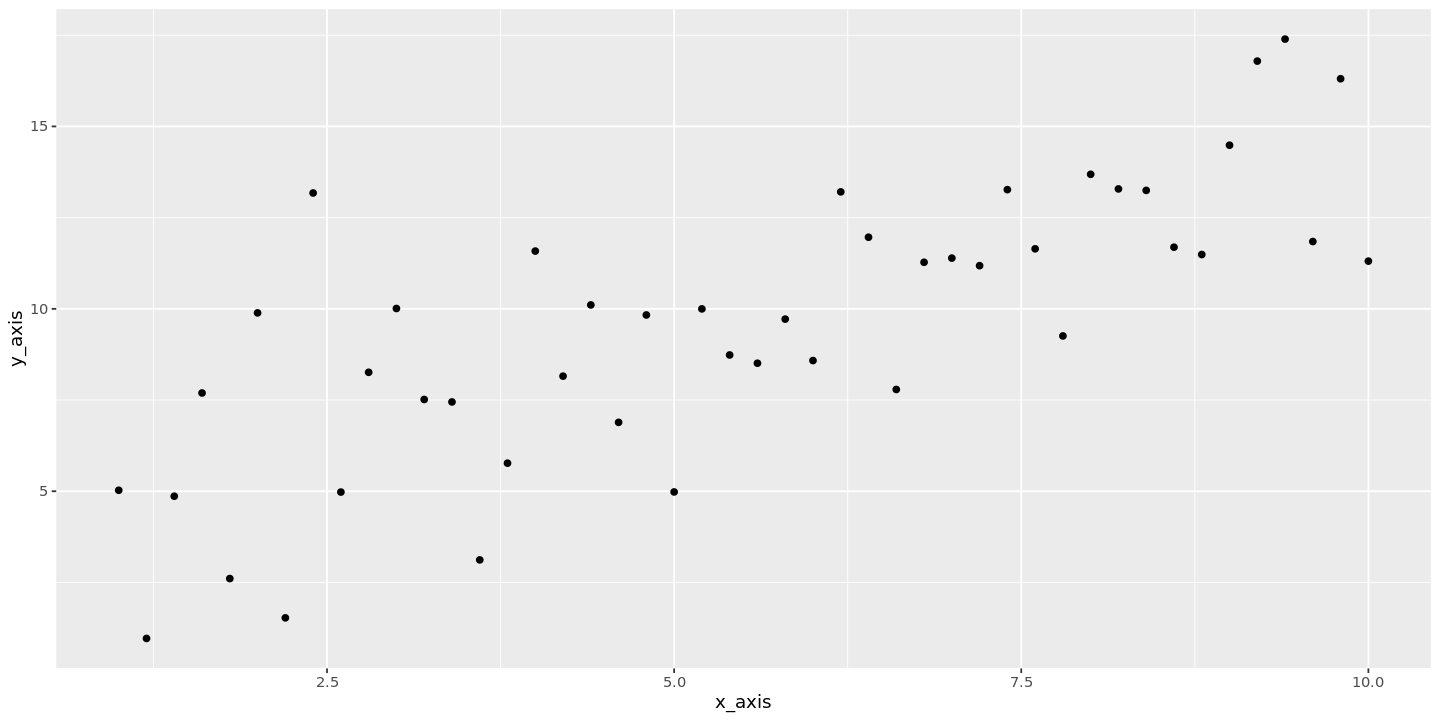

In [181]:

x_axis = seq(1, 10,0.2)
y_axis = 3 + 1.2 * x_axis + rnorm(length(x_axis), 0, 2)

ggplot()+
 geom_point(aes(x_axis, y_axis))



In [182]:
lm_model = lm(y_axis ~ x_axis)
summary(lm_model)


Call:
lm(formula = y_axis ~ x_axis)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.47260 -1.70362  0.12939  1.51441  6.95522 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  3.59031    0.84795  4.2341  0.000115 ***
x_axis       1.09602    0.13884  7.8941 5.728e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.5003 on 44 degrees of freedom
Multiple R-squared:  0.58614,	Adjusted R-squared:  0.57674 
F-statistic: 62.317 on 1 and 44 DF,  p-value: 5.7285e-10


### Tests for individual coefficients

* Does a vairbale contribute to the model?
* Does the improvement in R2 obtained by adding a predictor due to chance and not because it’s a better model?


* Null hypothesis, the contribution of the variable is null
  * The values observed are simply due to chance
* Alternative hypothesis, the contribution of the variable is null



### Tests for individual Coefficients - cont'd


Formally
$$
H0 : b = 0
H1 : b \ne 0 
$$

What doe this look (sound) like?

That's *exactly* the assumption for the one-sample $t$ 

* let's define a $t$-statistic like this,

$$
t = \frac{\hat{b}}{\mbox{SE}({\hat{b})}}
$$


In [183]:
random_var = rnorm(length(x_axis), 0, 2)
lm_model_2 = lm(y_axis ~ x_axis + random_var)
summary(lm_model_2)


Call:
lm(formula = y_axis ~ x_axis + random_var)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5595 -1.6489  0.1124  1.4085  6.8217 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  3.62962    0.86334  4.2042 0.0001301 ***
x_axis       1.09506    0.14026  7.8075 8.896e-10 ***
random_var  -0.06586    0.18231 -0.3613 0.7196806    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.5254 on 43 degrees of freedom
Multiple R-squared:  0.58739,	Adjusted R-squared:  0.5682 
F-statistic: 30.608 on 2 and 43 DF,  p-value: 5.4201e-09
